<div style="padding-bottom: 20px;"><a href='https://www.ppmi-info.org/'><img src='./icons/ppmi.png' width='180px' style='float: left; padding-right: 20px;'></a><h1 style='display: inline;'>Parkinson's Progression Markers Initiative Data Visualization</h1></div>

<hr style="border-color: #F7A80D;">
<p><div style="text-align: justify">The Parkinson's Progression Markers Initiative (PPMI) study is sponsored by the Michael J Fox Foundation and takes place in 35 different research cennters in North-America, Europe, Israël and Australia. This 13 years long study aims to identify clinical, imaging and biologic markers of PD progression for use in clinical trials of disease-modifying therapies.</div></p>
<hr style="border-color: #F7A80D;">

<h3>Quick stats</h3>
<ul>
    <li>35 research centers</li>
    <li>2000 subjects enrolled including 400 PD and 200 controls</li>
</ul>
<hr>
<center><a href="http://www.ppmi-info.org/wp-content/uploads/2018/02/PPMI-AM-13-Protocol.pdf"><h3>Complete study design available here !</h3></a></center>

In [1]:
import os
import nrrd
import numpy as np
import pandas as pd
import seaborn as sb
import nibabel as nib
import scipy.linalg as lin
import matplotlib.pyplot as plt

In [2]:
# Defining constants and paths
DATA_PATH = ".\\data"

DTI_FOLDER = "DTI"
T1_MRI_FOLDER = "T1_MRI"

IMAGE_COLLECTION_CHARAC_FOLDER = "image_collection_characteristics"
IMAGE_COLLECTION_CHARAC_FILE = "characteristics.csv"

MEDICAL_HISTORY_FOLDER = "medical_history"
MEDICAL_HISTORY_DIAG_FEATURES_FILE = "Diagnostic_Features.csv"

STUDY_DATA_FOLDER = "study_data"
STUDY_DATA_DATA_DICTIONARY_FILE = "data_dictionary.csv"

IMAGE_FOLDER = "images/PPMI"

CSV_SEPARATOR = ";"

<h3>Subject characteristics exploration and visualization</h3>

In [3]:
image_collection_dti_charac_df = pd.read_csv(os.path.join(
    DATA_PATH,
    IMAGE_COLLECTION_CHARAC_FOLDER,
    DTI_FOLDER,
    IMAGE_COLLECTION_CHARAC_FILE),sep=CSV_SEPARATOR)

medical_history_diag_features_df = pd.read_csv(os.path.join(
    DATA_PATH,
    MEDICAL_HISTORY_FOLDER,
    MEDICAL_HISTORY_DIAG_FEATURES_FILE),sep=CSV_SEPARATOR)

data_dictionary_df = pd.read_csv(os.path.join(
    DATA_PATH,
    STUDY_DATA_FOLDER,
    STUDY_DATA_DATA_DICTIONARY_FILE),sep=CSV_SEPARATOR)

In [4]:
med_hist_and_characs_df = (medical_history_diag_features_df.rename(columns={"PATNO": "Subject"})
    .groupby("Subject")
    .first()
    .merge(image_collection_dti_charac_df[["Subject", "Group", "Age", "Sex"]],on="Subject")
    .drop_duplicates()
    .reset_index(drop=True))

In [5]:
# Defining basic filters
is_healthy_control = med_hist_and_characs_df["Group"] == "Control"
is_patient = med_hist_and_characs_df["Group"] == "PD"

is_male = med_hist_and_characs_df["Sex"] == "M"
is_female = med_hist_and_characs_df["Sex"] == "F"

is_baseline = med_hist_and_characs_df["EVENT_ID"] == "BL"

Text(0.5,0.98,'Diagnostic features')

<Figure size 432x288 with 0 Axes>

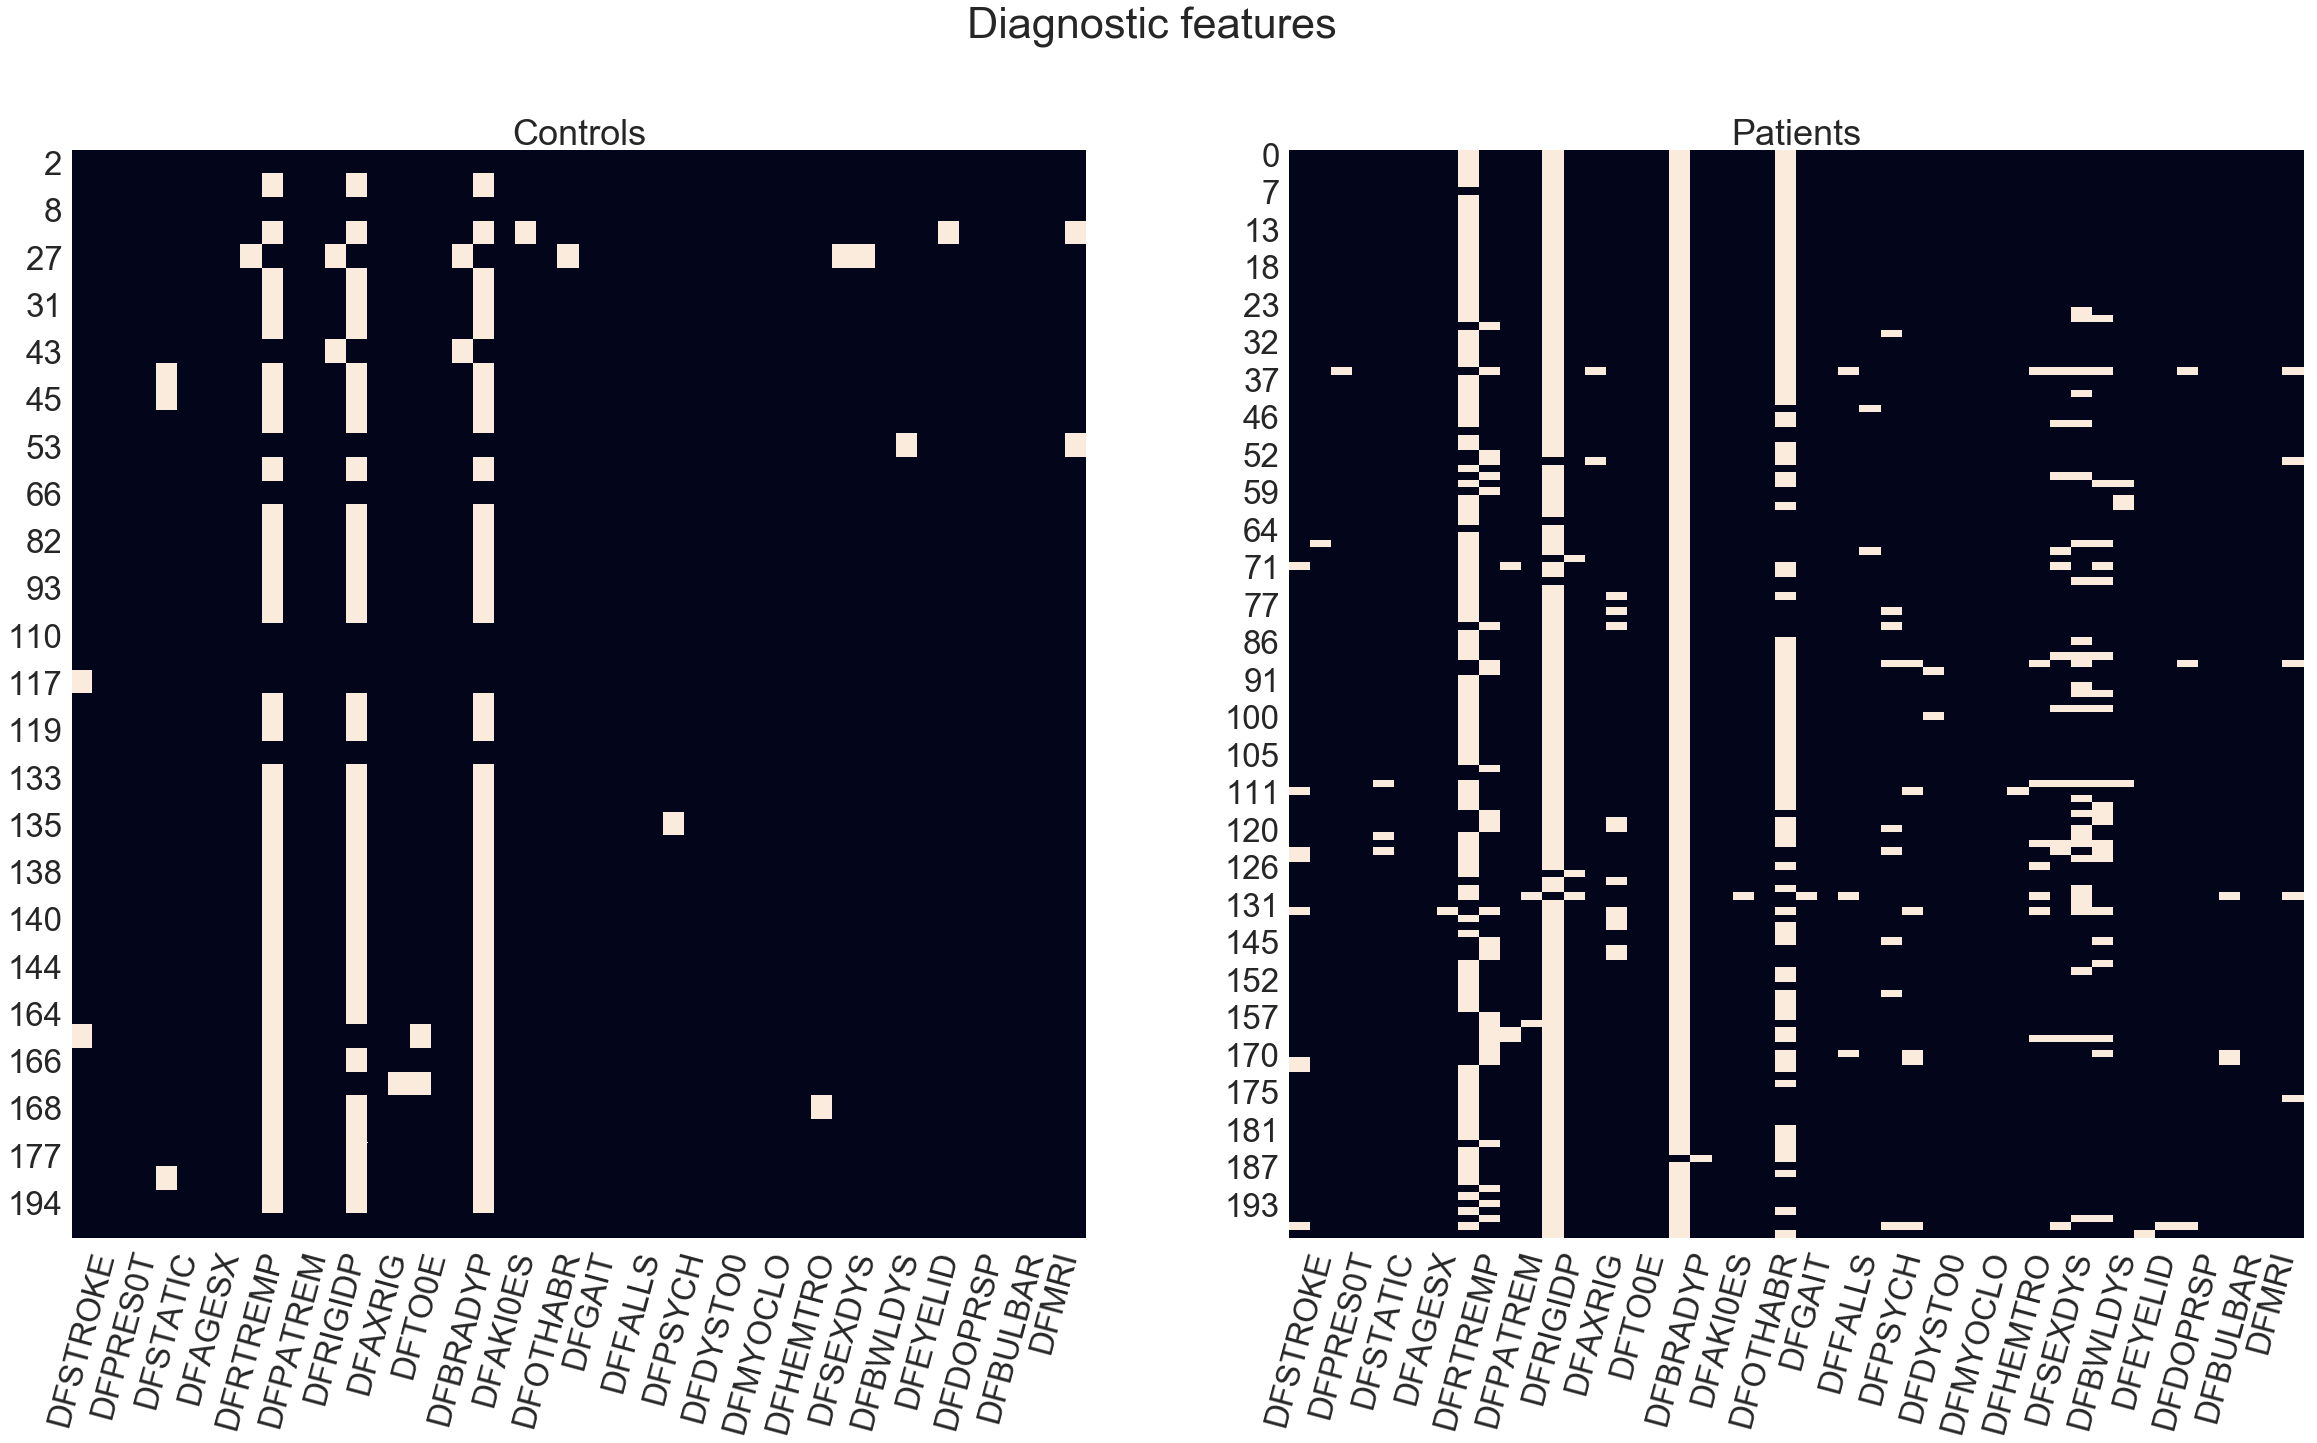

In [7]:
diag_features_df = med_hist_and_characs_df.drop(["EVENT_ID", "Age", "Sex", "Subject"], axis=1)

plt.figure()
sb.set(font_scale=3)
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(40, 20))

ax.set_title("Controls")
control_heatmap = sb.heatmap(
    diag_features_df[diag_features_df["Group"] == "Control"].drop(["Group"], axis=1),
    ax=ax,
    cbar=False)
ax.tick_params(axis="x", rotation=75)

ax2.set_title("Patients")
patients_heatmap = sb.heatmap(
    diag_features_df[diag_features_df["Group"] == "PD"].drop(["Group"], axis=1),
    ax=ax2,
    cbar=False)
ax2.tick_params(axis="x", rotation=75)

fig.suptitle("Diagnostic features")

<h3>Study population age analysis</h3>

Men patients mean age: 61.776595744680854
Female patients mean age: 59.84313725490196

Men controls mean age: 62.0
Female controls mean age: 59.68421052631579


<Figure size 432x288 with 0 Axes>

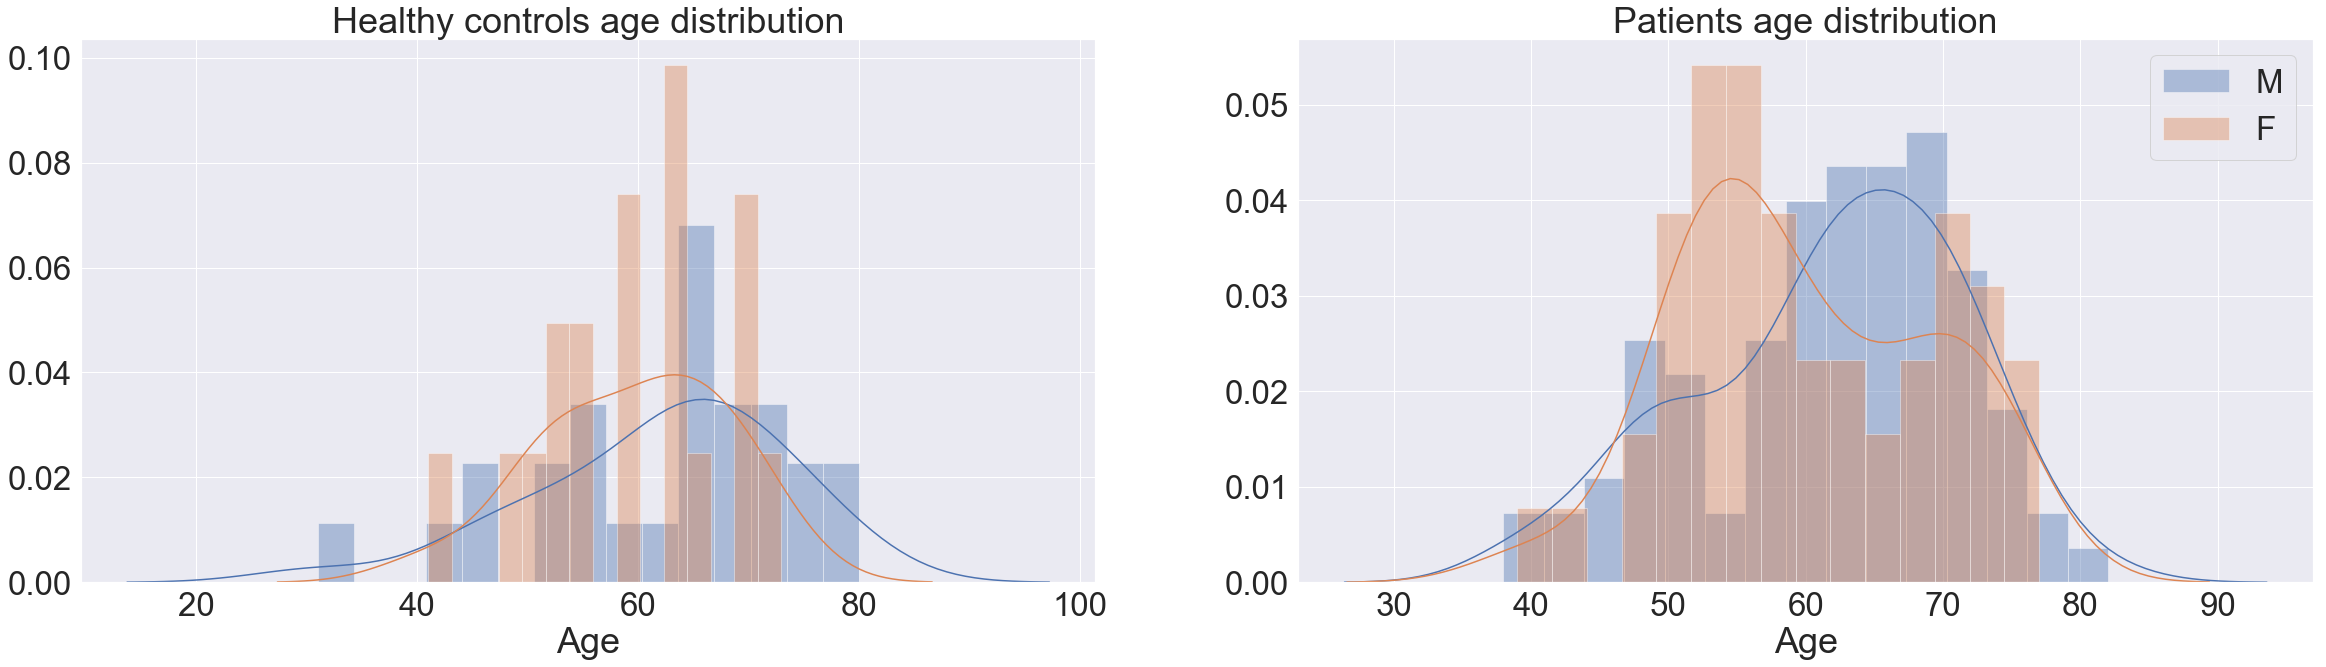

In [7]:
plt.figure()
sb.set(font_scale=3)
Xfig, (ax, ax2) = plt.subplots(ncols=2, figsize=(40,10))

ax.set_title("Healthy controls age distribution")
sb.distplot(med_hist_and_characs_df[is_healthy_control & is_male]['Age'], ax=ax, bins=15, label='M')
sb.distplot(med_hist_and_characs_df[is_healthy_control & is_female]['Age'], ax=ax, bins=15, label='F')

ax2.set_title("Patients age distribution")
sb.distplot(med_hist_and_characs_df[is_patient & is_male]['Age'], ax=ax2, bins=15, label='M')
sb.distplot(med_hist_and_characs_df[is_patient & is_female]['Age'], ax=ax2, bins=15, label='F')
plt.legend()

print("Men patients mean age: {}".format(np.mean(med_hist_and_characs_df[is_patient & is_male]['Age'])))
print("Female patients mean age: {}".format(np.mean(med_hist_and_characs_df[is_patient & is_female]['Age'])))
print("")
print("Men controls mean age: {}".format(np.mean(med_hist_and_characs_df[is_healthy_control & is_male]['Age'])))
print("Female controls mean age: {}".format(np.mean(med_hist_and_characs_df[is_healthy_control & is_female]['Age'])))

<h3>Study groups (DTI only)</h3>

> Quickstats: There is 170 PD patients and 76 Controls with corresponding DTI images.

Text(0,0.5,'Nb. of subjects')

<Figure size 432x288 with 0 Axes>

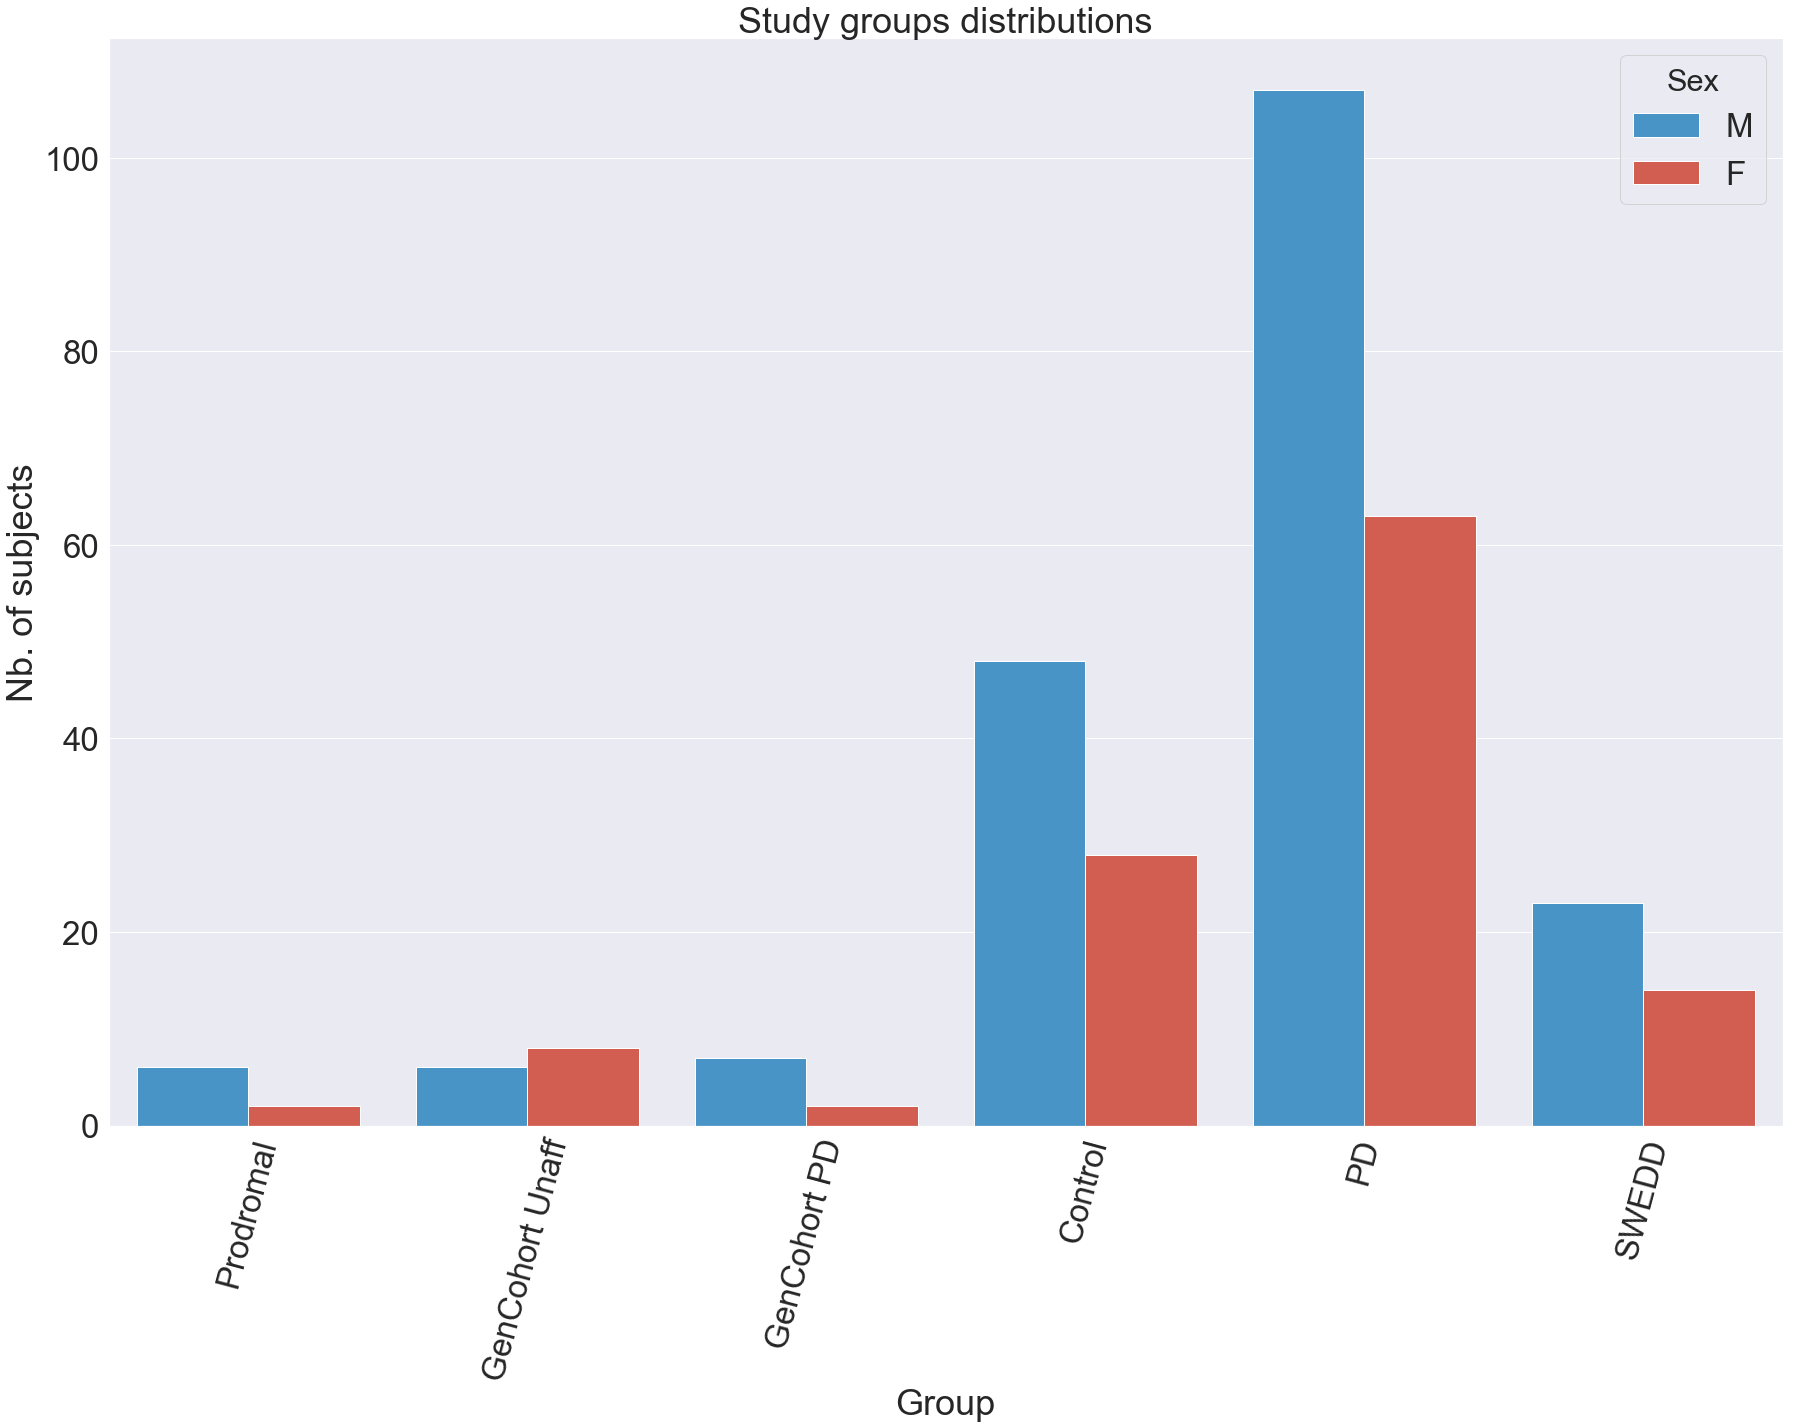

In [8]:
plt.figure()
sb.set(font_scale=3)
Xfig, ax = plt.subplots(figsize=(30,20))
ax.set_title("Study groups distributions")
count_plot = sb.countplot(x="Group", data=image_collection_dti_charac_df, hue="Sex",palette={'M': "#3498db", 'F': "#e74c3c"},ax=ax)

for label in count_plot.get_xticklabels():
    label.set_rotation(75)

count_plot.set_ylabel("Nb. of subjects")


In [9]:
dataFrame = pd.DataFrame(image_collection_dti_charac_df['Group'].value_counts()).reset_index()
dataFrame.columns = ['Group', 'Count']
dataFrame

,Group,Count
0,PD,170
1,Control,76
2,SWEDD,37
3,GenCohort Unaff,14
4,GenCohort PD,9
5,Prodromal,8


<h3>DTI visualization</h3>

In [30]:
SUBJECT_ID = "4083"
NRRD_IMAGE_FILE = "PPMI_4083_MR_DTI_Full_Tensors-MRI_Br_20140129162043184_S181396_I411140.nrrd"
NIFTI_IMAGE_FILE = "PPMI_4083_MR_DTI_Full_Tensors-MRI_Br_20140129162043184_S181396_I411140.nii"

nrrd_image, header = nrrd.read(os.path.join(DATA_PATH, IMAGE_FOLDER, SUBJECT_ID, NRRD_IMAGE_FILE))

nifti_image = nib.load(os.path.join(DATA_PATH, IMAGE_FOLDER, SUBJECT_ID, NIFTI_IMAGE_FILE))

In [46]:
print("NRRD tensor values:\n {} \n".format(nrrd_image[50][120][100].reshape((3,3))))
print("Nifti tensor values:\n {}".format(nifti_image.get_fdata()[50][120][100].reshape((3,3))))

NRRD tensor values:
 [[ 9.8049769e-04 -4.3928508e-06  2.4044079e-05]
 [-4.3928508e-06  9.1812038e-04  1.6206179e-05]
 [ 2.4044079e-05  1.6206179e-05  8.8660681e-04]] 

Nifti tensor values:
 [[ 9.37655685e-04 -7.89367277e-07 -3.70289345e-05]
 [-7.89367277e-07  8.50094424e-04  1.76704416e-05]
 [-3.70289345e-05  1.76704416e-05  8.71978409e-04]]


In [40]:
lin.eig(nrrd_image[50][120][100].reshape((3,3)))

(array([0.0009863 +0.j, 0.00087437+0.j, 0.00092456+0.j], dtype=complex64),
 array([[ 0.97236675, -0.2203717 , -0.07706541],
        [-0.00718341, -0.3581906 ,  0.9336212 ],
        [ 0.23334806,  0.9072684 ,  0.34987473]], dtype=float32))

In [41]:
lin.eig(nifti_image.get_fdata()[50][120][100].reshape((3,3)))

(array([0.00095493+0.j, 0.00086841+0.j, 0.00083639+0.j]),
 array([[ 0.90413603, -0.36915978,  0.21507926],
        [-0.07762295, -0.63696537, -0.76697445],
        [-0.42013416, -0.67675415,  0.60455861]]))

In [ ]:
def compute_FA_of(full_tensor_image):
    SLICE_INDEX = 0
    COLUMN_INDEX = 1
    ROW_INDEX = 2
    
    image_shape = full_tensor_image.shape
    fa_image = np.zeros(full_tensor_image.shape[:-1])
        

In [50]:
nifti_image.get_fdata().shape

(176, 240, 256, 9)